<h1 style="text-align: center;font-size: 40px">Исследование и подготовка данных к обучению</h1>

# Содержание
### 1. [Исследование данных](#chapter1)
#### 1.1. [Знакомство с датасетом и описанием таргетов](#chapter1.1)
#### 1.2. [Распределение длины текстов](#chapter1.2)
### 2. [Обработка датасета для подготовки к обучению моделей](#chapter2)
#### 2.1. [Пустые значения](#chapter2.1)
#### 2.2. [Работа с тегами](#chapter2.2)
##### 2.2.1. [Получение списка всех имеющихся в датасете тегов](#chapter2.2.1)
##### 2.2.2. [One-hot-encoding тегов для каждой строки](#chapter2.2.2)
#### 2.3. [Работа с текстами](#chapter2.3)

In [1]:
import numpy as np
import pandas as pd

<center id="chapter1"><h1 style="font-size: 24px"> 1. Исследование данных </h1></center>

## 1.1. Знакомство с датасетом и описанием таргетов <a id="chapter1.1"></a>

In [2]:
data = pd.read_csv("../data/original/train.csv.csv", index_col=0)
data.head(2)

,index,assessment,tags,text,trend_id_res0,trend_id_res1,trend_id_res2,trend_id_res3,trend_id_res4,trend_id_res5,...,trend_id_res40,trend_id_res41,trend_id_res42,trend_id_res43,trend_id_res44,trend_id_res45,trend_id_res46,trend_id_res47,trend_id_res48,trend_id_res49
0,5652,6.0,"{ASSORTMENT,PROMOTIONS,DELIVERY}","Маленький выбор товаров, хотелось бы ассортиме...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18092,4.0,"{ASSORTMENT,PRICE,PRODUCTS_QUALITY,DELIVERY}",Быстро,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data['assessment'].describe()

count    4623.000000
mean        3.289206
std         2.163499
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max         6.000000
Name: assessment, dtype: float64

In [4]:
print("Частота появления каждого класса:")
for i in range(50):
    print(f"trend_id_res{i} = ", np.sum(data[f"trend_id_res{i}"]))

Частота появления каждого класса:
trend_id_res0 =  837
trend_id_res1 =  347
trend_id_res2 =  597
trend_id_res3 =  361
trend_id_res4 =  126
trend_id_res5 =  52
trend_id_res6 =  21
trend_id_res7 =  35
trend_id_res8 =  140
trend_id_res9 =  10
trend_id_res10 =  96
trend_id_res11 =  108
trend_id_res12 =  624
trend_id_res13 =  34
trend_id_res14 =  73
trend_id_res15 =  81
trend_id_res16 =  191
trend_id_res17 =  9
trend_id_res18 =  231
trend_id_res19 =  360
trend_id_res20 =  132
trend_id_res21 =  99
trend_id_res22 =  25
trend_id_res23 =  65
trend_id_res24 =  10
trend_id_res25 =  13
trend_id_res26 =  27
trend_id_res27 =  530
trend_id_res28 =  420
trend_id_res29 =  61
trend_id_res30 =  306
trend_id_res31 =  50
trend_id_res32 =  13
trend_id_res33 =  28
trend_id_res34 =  11
trend_id_res35 =  58
trend_id_res36 =  167
trend_id_res37 =  46
trend_id_res38 =  28
trend_id_res39 =  44
trend_id_res40 =  72
trend_id_res41 =  21
trend_id_res42 =  35
trend_id_res43 =  44
trend_id_res44 =  27
trend_id_res45 =

In [5]:
description = pd.read_csv("../data/original/trends_description.csv.csv", index_col='trend_id')
description

,trend,explanation
trend_id,,
0,Долгая доставка,- долго везёте\n- очень долго везёте\n- сюда о...
1,Доставка стала долгой,"- клиент делает акцент на то, что раньше мы до..."
2,Время доставки не соответствует заявленому,"- клиент акцентирует внимание, что SLA не соот..."
3,Регулярные опоздания,"- клиент акцентриет внимание, что мы часто/каж..."
4,Не отследить реальное время доставки,"- клиент говорит о том, что невозможно понять,..."
5,Курьер на карте,- если клиент упоминает отображение курьера на...
6,Нет доставки по адресу,"клиент жалутеся, что нет доставки по адресу"
7,Не предупреждаем об удалении товара,- не предупреждаем об удалении товара\n- не пр...
8,Высокая минимальная сумма заказа,клиент жалуется на размер минимальной суммы за...


## 1.2. Распределение длины текстов  <a id="chapter1.2"></a>

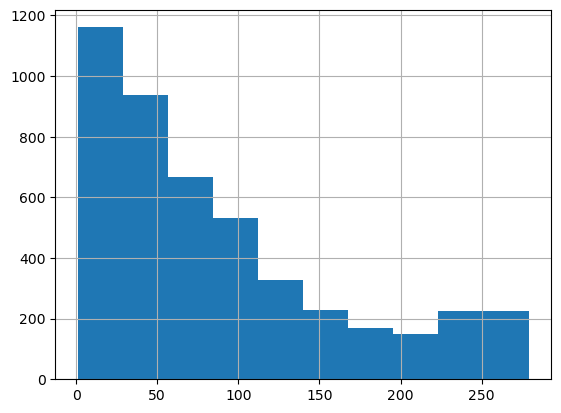

In [6]:
data['text'].str.len().hist();

__Вывод:__ очень много отзывов с короткими или даже отсутствующими текстами. Поэтому предсказать список проблем только на основе текстов может быть проблематично.

<center id="chapter2"><h1 style="font-size: 24px"> 2. Обработка датасета для подготовки к обучению моделей  </h1></center>

## 2.1 Пустые значения <a id="chapter2.1"></a>

Пустые значения в полях tags и text будем заменять на пустые строки.

При наличии пустых значений в других полях действовать следует иначе:
1) Удаление - теряем данные, к тому же это может быть полезно только на train датасете, а на тестовых данных просто выкинуть такие строки не выйдет.
2) В полях trend_id_res{X} пустые значения буду заменять на 0.
3) Столбец assesment бесполезный, выкину его.
4) Пропуск в index нехорошее дело. Для обучения этот столбец бесполезен, на тестовой пропусков быть не должно.

In [7]:
len(data) # Взглянем на общее число записей

4623

In [8]:
data.info() # Посмотрим на количество пропусков в каждом столбце

<class 'pandas.core.frame.DataFrame'>
Index: 4623 entries, 0 to 8707
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4623 non-null   int64  
 1   assessment      4623 non-null   float64
 2   tags            4612 non-null   object 
 3   text            4623 non-null   object 
 4   trend_id_res0   4623 non-null   int64  
 5   trend_id_res1   4623 non-null   int64  
 6   trend_id_res2   4623 non-null   int64  
 7   trend_id_res3   4623 non-null   int64  
 8   trend_id_res4   4623 non-null   int64  
 9   trend_id_res5   4623 non-null   int64  
 10  trend_id_res6   4623 non-null   int64  
 11  trend_id_res7   4623 non-null   int64  
 12  trend_id_res8   4623 non-null   int64  
 13  trend_id_res9   4623 non-null   int64  
 14  trend_id_res10  4623 non-null   int64  
 15  trend_id_res11  4623 non-null   int64  
 16  trend_id_res12  4623 non-null   int64  
 17  trend_id_res13  4623 non-null   int64 

__Наблюдение__: Пропуски замечены только в столбце `tag`, заменим их на пустые строки.

In [9]:
data[data['tags'].isna()] = data[data['tags'].isna()].fillna('')

In [10]:
# Можно убедиться, что теперь всё хорошо
#data.info()

## 2.2. Работа с тегами <a id="chapter2.2"></a>

### 2.2.1. Получение списка всех имеющихся в датасете тегов <a id="chapter2.2.1"></a>

In [11]:
def string_to_set(string):
  elements = string.strip('{}').split(',')
  set_result = set(element.strip() for element in elements)
  return set_result

In [12]:
def get_all_tags(df, tags_col='tags'):
    all_tags = set()
    for ind in df.index:
        current_string_tags = df.loc[ind][tags_col]
        current_set_tags = string_to_set(current_string_tags)
        if '' not in current_set_tags:
            all_tags = all_tags | current_set_tags
    return all_tags

In [13]:
tags_set = get_all_tags(data, tags_col='tags')

In [14]:
tags_set

{'ASSORTMENT',
 'CATALOG_NAVIGATION',
 'DELIVERY',
 'PAYMENT',
 'PRICE',
 'PRODUCTS_QUALITY',
 'PROMOTIONS',
 'SUPPORT'}

### 2.2.2. One-hot-encoding тегов для каждой строки  <a id="chapter2.2.2"></a>

In [15]:
def make_tags_df(df, tags_set):
    tags_list = list(tags_set)
    tags_list = sorted(tags_list)
    new_df = pd.DataFrame(columns=tags_list)

    for _, row in df.iterrows():
        tags = string_to_set(row['tags'])
        for tag in tags_list:
            if tag in tags:
                new_df.loc[row.name, tag] = 1
            else:
                new_df.loc[row.name, tag] = 0
    return new_df

In [16]:
tags_df = pd.DataFrame(make_tags_df(data, tags_set).values, columns=sorted(list(tags_set)))
tags_df.head()

,ASSORTMENT,CATALOG_NAVIGATION,DELIVERY,PAYMENT,PRICE,PRODUCTS_QUALITY,PROMOTIONS,SUPPORT
0,1,0,1,0,0,0,1,0
1,1,0,1,0,1,1,0,0
2,1,0,1,0,1,0,1,1
3,1,0,0,0,1,0,1,0
4,0,0,0,0,1,0,1,0


Сохраним полученную таблицу:

In [17]:
tags_df.to_csv("../data/processed/tags_df.csv")

## 2.3. Работа с текстами <a id="chapter2.3"></a>

Обработаем тексты: 
1. Удалим ненужные символы(смайлики и прочее).
2. Приведём к нижнему регистру.

In [18]:
text_df = pd.DataFrame(data['text'].values, columns=['text'])
text_df

,text
0,"Маленький выбор товаров, хотелось бы ассортиме..."
1,Быстро
2,Доставка постоянно задерживается
3,Наценка и ассортимент расстраивают
4,Можно немного скинуть минимальную сумму заказа...
...,...
4618,Привезли прокисший суп
4619,пойдет
4620,Не дают абузить поддержка не возвращает деньги...
4621,"Очень плохая доставка в первую очередь, постоя..."


In [19]:
import re
from bs4 import BeautifulSoup


def preprocessor(text):
    
    text = BeautifulSoup(text, "html.parser").get_text() # Удаляем HTML
    text = re.sub(r'http\S+', '', text)  # Удаление ссылок
    text = re.sub(r'\d+', '', text)  # Удаление номеров
    text = re.sub(r'\s+', ' ', text) # удаление лишних пробелов
    text = re.sub(r'[^a-zA-Zа-яА-Я0-9\.,?!\s]', '', text) # Удаление всех символов кроме значимых(буквы, пунктуация)
    text = text.lower()
    
    return text

In [20]:
text_df['text'] = text_df['text'].apply(preprocessor)
text_df.head()

C:\Users\Максат\AppData\Local\Temp\ipykernel_9844\731392797.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text() # Удаляем HTML


,text
0,"маленький выбор товаров, хотелось бы ассортиме..."
1,быстро
2,доставка постоянно задерживается
3,наценка и ассортимент расстраивают
4,можно немного скинуть минимальную сумму заказа...


Сохраним полученную таблицу:

In [21]:
text_df.to_csv("../data/processed/text_df.csv")